In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

#from sklearn import datasets, linear_model
#from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
# Uncomment when running locally
data = pd.read_csv('data/Heart Attack Data Set.csv')
index_dropped_rows=[]

In [3]:
print(data.columns.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [4]:
display(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Análisis de Datos

## Sex

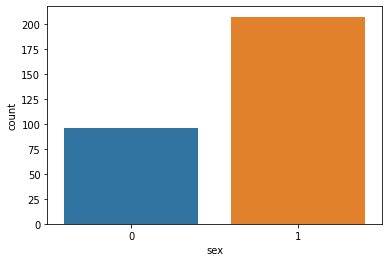

In [6]:
sns.countplot(data=data,x='sex')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

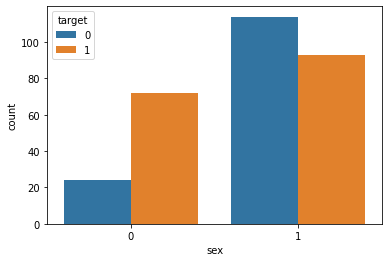

In [7]:
sns.countplot(data=data,x='sex', hue='target')

## Age

<AxesSubplot:xlabel='target', ylabel='age'>

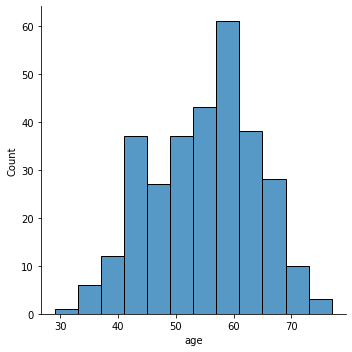

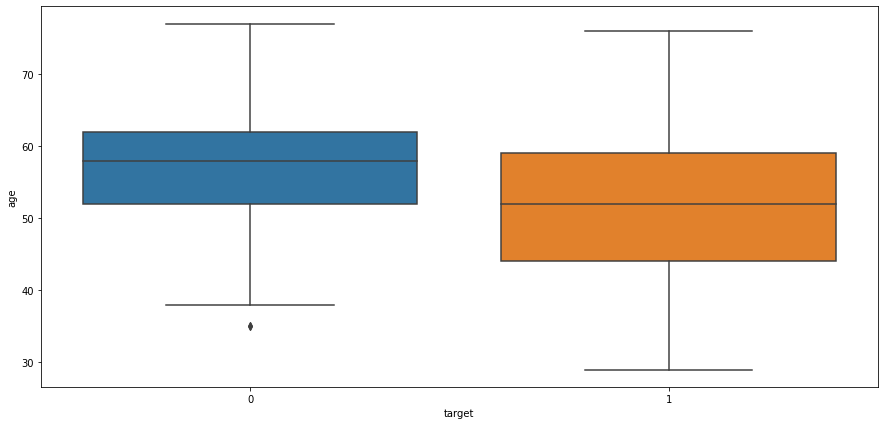

In [8]:
data['age'].nunique()
sns.displot(data['age'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='age')

## Chest Pain type 
1: typical angina (all criteria present)
2: atypical angina (two of three criteria satisfied)  
3: non-anginal pain (less than one criteria satisfied) 
4: asymptomatic (none of the criteria are satisfied)

<AxesSubplot:xlabel='cp', ylabel='count'>

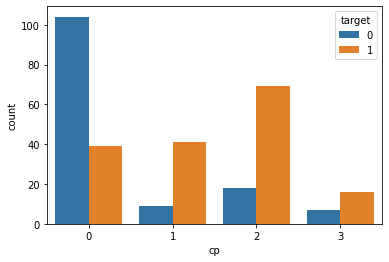

In [9]:
sns.countplot(data=data,x='cp',hue='target')

## Resting Blood pressure 
(in mmHg, upon admission to the hospital)

2


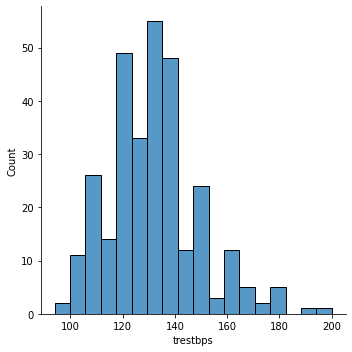

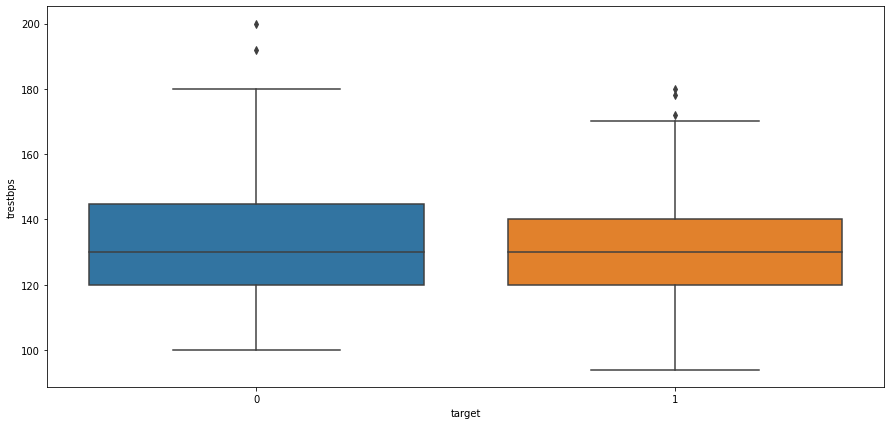

In [10]:
data['trestbps'].nunique()
sns.displot(data['trestbps'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='trestbps')


print(len(data[data['trestbps']>180]))

In [11]:
data[data['trestbps']>180]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [12]:
remove_data=data.index[data['trestbps']>180].tolist()
index_dropped_rows.extend(remove_data)
index_dropped_rows

[223, 248]

## Cholesterol
Serum cholesterol in mg/dL

<AxesSubplot:xlabel='target', ylabel='chol'>

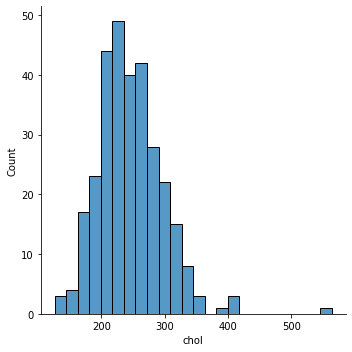

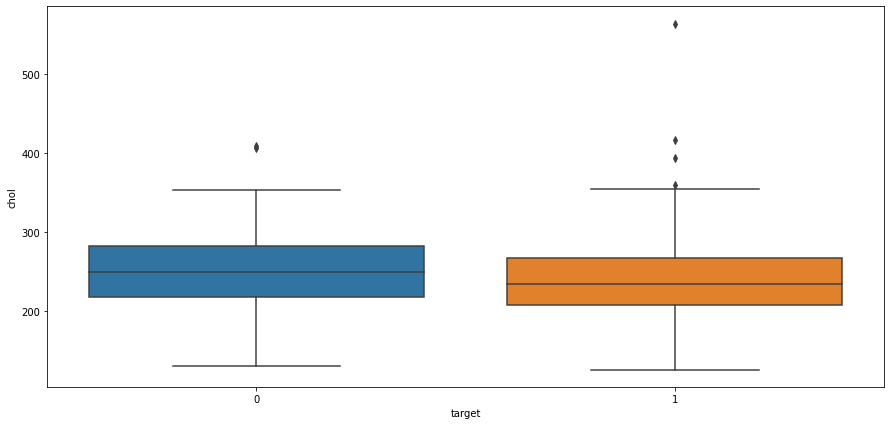

In [13]:
data['chol'].nunique()
sns.displot(data['chol'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='chol')

In [14]:
data[data['chol']>500]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [15]:
remove_data=data.index[data['chol']>500].tolist()
for i in remove_data:
  index_dropped_rows.append(i)

## Fasting Blood Sugar 
Above 120 mg/dL (likely to be diabetic) 
1 = true; 0 = false

<AxesSubplot:xlabel='fbs', ylabel='count'>

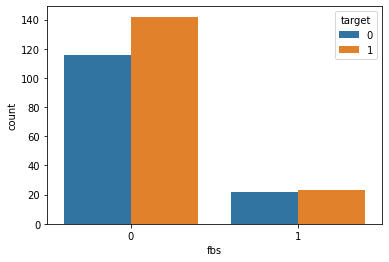

In [16]:
sns.countplot(data=data,x='fbs',hue='target')

## RestECG
Resting electrocardiogram results -- 
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

<AxesSubplot:xlabel='restecg', ylabel='count'>

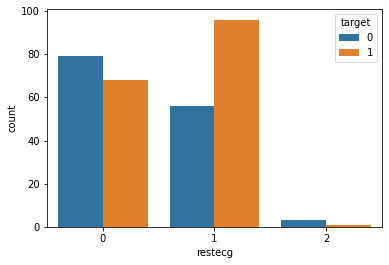

In [17]:
sns.countplot(data=data,x='restecg',hue='target')

## MaxHR 
Greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise. 

<AxesSubplot:xlabel='target', ylabel='thalach'>

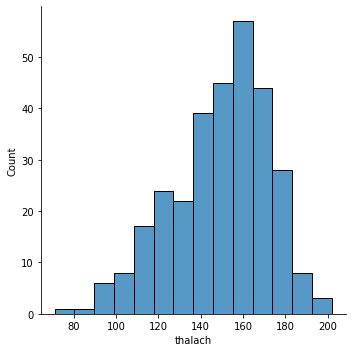

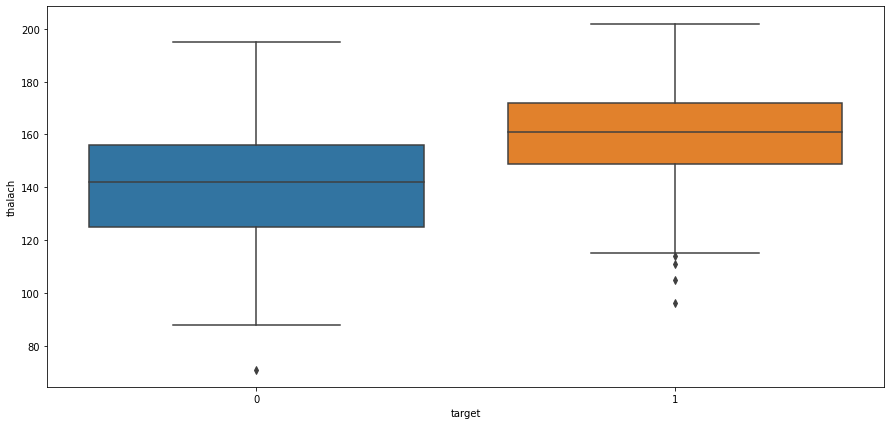

In [18]:
data['thalach'].nunique()
sns.displot(data['thalach'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='thalach')

In [19]:
data[data['thalach']<80]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [20]:
remove_data=data.index[data['thalach']<80].tolist()
index_dropped_rows.extend(remove_data)
index_dropped_rows

[223, 248, 85, 272]

## Exang: exercise induced angina 
(1 = yes; 0 = no)  

<AxesSubplot:xlabel='exang', ylabel='count'>

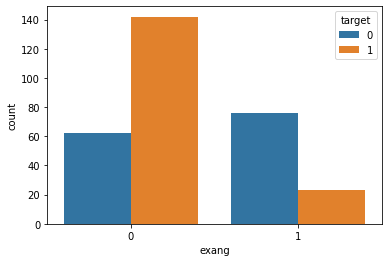

In [21]:
sns.countplot(data=data,x='exang',hue='target')

## Oldpeak
ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest)

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

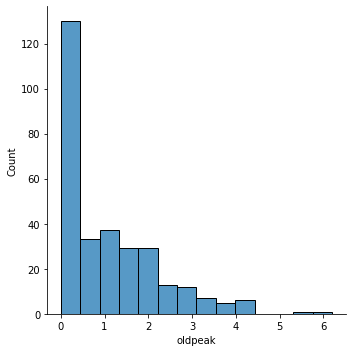

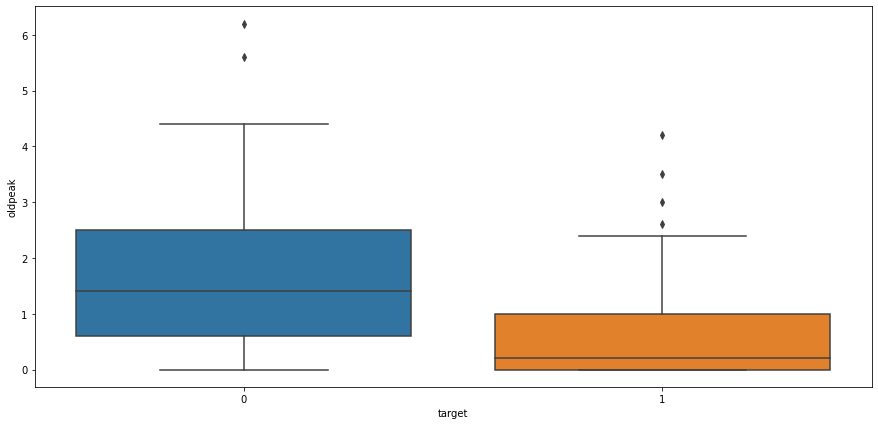

In [22]:
data['oldpeak'].nunique()
sns.displot(data['oldpeak'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='oldpeak')

In [23]:
data[data['oldpeak']>5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [24]:
remove_data=data.index[data['oldpeak']>5].tolist()
index_dropped_rows.extend(remove_data)
index_dropped_rows

[223, 248, 85, 272, 204, 221]

## Slope
The slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia 
Value 1: upsloping 
Value 2: flat 
Value 3: downsloping 

<AxesSubplot:xlabel='slope', ylabel='count'>

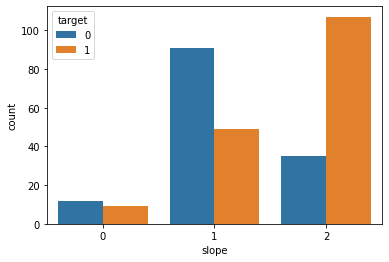

In [25]:
sns.countplot(data=data,x='slope',hue='target')

## Ca: number of major vessels (0-3) colored by fluoroscopy.
Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue).

<AxesSubplot:xlabel='ca', ylabel='count'>

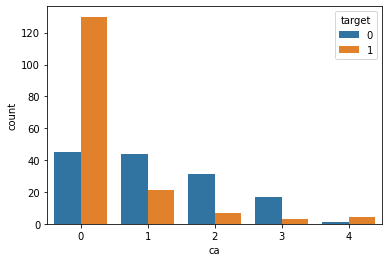

In [26]:
sns.countplot(data=data,x='ca',hue='target')

## AHD:
0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test) 

<AxesSubplot:xlabel='thal', ylabel='count'>

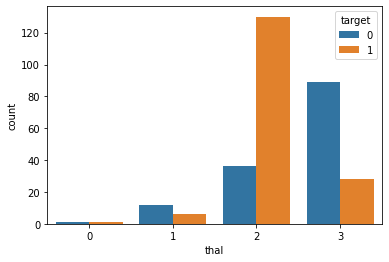

In [27]:
sns.countplot(data=data,x='thal',hue='target')

# Heatmap

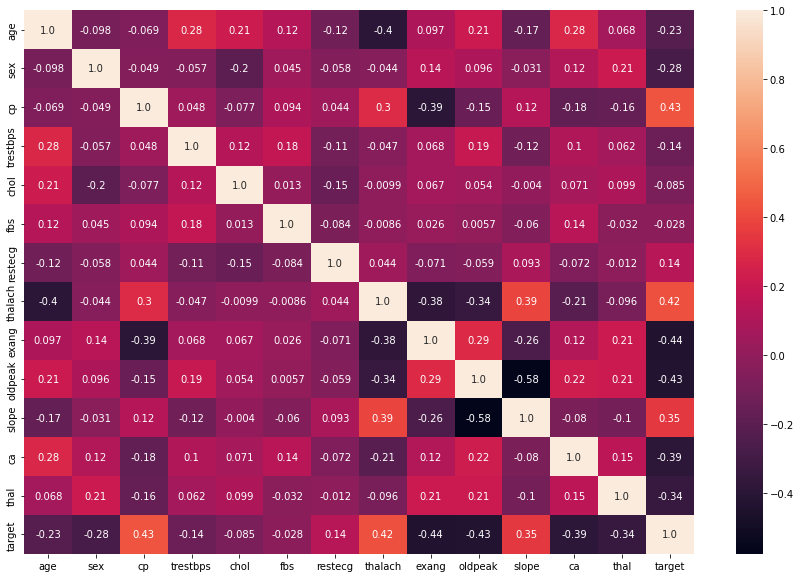

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')
plt.show()

In [29]:
data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## One hot encoding for categorical Values

- **RestECG**: Resting electrocardiogram results 
    - 0: normal 
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 8.
- **Chest Pain type**
    - 1: typical angina (all criteria present) 
    - 2: atypical angina (two of three criteria satisfied)
    - 3: non-anginal pain (less than one criteria satisfied)
    - 4: asymptomatic (none of the criteria are satisfied)
- **Slope**: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia 
    - 1: upsloping
    - 2: flat
    - 3: downsloping
- **AHD**:
    - 0 = normal
    - 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest)
    - 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
## RestECG

enc = OneHotEncoder(sparse=False)

encodedValues = enc.fit_transform(data[["restecg"]])

encodedValues = pd.DataFrame({
    "RestECG normal" : encodedValues[:,0],
    "RestECG abnormal" : encodedValues[:,1],
    "RestECG ventricular hypertrophy" : encodedValues[:,2],
})

data = pd.concat([data,encodedValues], axis=1)

data.pop("restecg")

data.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy
0,63,1,3,145,233,1,150,0,2.3,0,0,1,1,1.0,0.0,0.0
1,37,1,2,130,250,0,187,0,3.5,0,0,2,1,0.0,1.0,0.0
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1,1.0,0.0,0.0
3,56,1,1,120,236,0,178,0,0.8,2,0,2,1,0.0,1.0,0.0
4,57,0,0,120,354,0,163,1,0.6,2,0,2,1,0.0,1.0,0.0


In [32]:
encodedValues = enc.fit_transform(data[["cp"]])

encodedValues = pd.DataFrame({
    "Chest Pain typical angina" : encodedValues[:,0],
    "Chest Pain atypical angina" : encodedValues[:,1],
    "Chest Pain non-anginal pain" : encodedValues[:,2],
    "Chest Pain asymptomatic" : encodedValues[:,3],
})

data = pd.concat([data,encodedValues], axis=1)

data.pop("cp")

data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic
0,63,1,145,233,1,150,0,2.3,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,37,1,130,250,0,187,0,3.5,0,0,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,0,130,204,0,172,0,1.4,2,0,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,56,1,120,236,0,178,0,0.8,2,0,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,57,0,120,354,0,163,1,0.6,2,0,2,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [33]:
encodedValues = enc.fit_transform(data[["slope"]])

encodedValues = pd.DataFrame({
    "Slope Upscaling" : encodedValues[:,0],
    "Slope Flat" : encodedValues[:,1],
    "Slope Downscaling" : encodedValues[:,2]
})

data = pd.concat([data,encodedValues], axis=1)

data.pop("slope")

data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,...,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic,Slope Upscaling,Slope Flat,Slope Downscaling
0,63,1,145,233,1,150,0,2.3,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,0,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,41,0,130,204,0,172,0,1.4,0,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
encodedValues = enc.fit_transform(data[["thal"]])

encodedValues = pd.DataFrame({
    "AHD Normal" : encodedValues[:,0],
    "AHD Fixed Defect" : encodedValues[:,1],
    "AHD Reversible Defect" : encodedValues[:,2]
})

data = pd.concat([data,encodedValues], axis=1)

data.pop("thal")

data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic,Slope Upscaling,Slope Flat,Slope Downscaling,AHD Normal,AHD Fixed Defect,AHD Reversible Defect
0,63,1,145,233,1,150,0,2.3,0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,37,1,130,250,0,187,0,3.5,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,41,0,130,204,0,172,0,1.4,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [35]:
#Removing outliers
data.drop(index=index_dropped_rows, inplace=True)

In [36]:
y = data.pop("target")
X = data

In [37]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [38]:
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,RestECG normal,...,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic,Slope Upscaling,Slope Flat,Slope Downscaling,AHD Normal,AHD Fixed Defect,AHD Reversible Defect
0,63,1,145,233,1,150,0,2.3,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,37,1,130,250,0,187,0,3.5,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,41,0,130,204,0,172,0,1.4,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [39]:
# Ver los valores únicos de las columnas para determinar si los datos son numéricos o categóricos 
X.nunique()

age                                 41
sex                                  2
trestbps                            47
chol                               148
fbs                                  2
thalach                             89
exang                                2
oldpeak                             38
ca                                   5
RestECG normal                       2
RestECG abnormal                     2
RestECG ventricular hypertrophy      2
Chest Pain typical angina            2
Chest Pain atypical angina           2
Chest Pain non-anginal pain          2
Chest Pain asymptomatic              2
Slope Upscaling                      2
Slope Flat                           2
Slope Downscaling                    2
AHD Normal                           2
AHD Fixed Defect                     2
AHD Reversible Defect                2
dtype: int64

## We need to divide the categoric from the continuous values to standardize the numeric values, but not the categorical ones.

In [40]:
categoric = X.drop(["age", "trestbps", "chol", "thalach", "oldpeak", "ca"], axis=1)
categoric.head()

,sex,fbs,exang,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic,Slope Upscaling,Slope Flat,Slope Downscaling,AHD Normal,AHD Fixed Defect,AHD Reversible Defect
0,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [41]:
X = X[["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]]
X.head()

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0


In [42]:
featureTags = list(X.columns)
featureTags.extend(categoric.columns)
featureTags

['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'ca',
 'sex',
 'fbs',
 'exang',
 'RestECG normal',
 'RestECG abnormal',
 'RestECG ventricular hypertrophy',
 'Chest Pain typical angina',
 'Chest Pain atypical angina',
 'Chest Pain non-anginal pain',
 'Chest Pain asymptomatic',
 'Slope Upscaling',
 'Slope Flat',
 'Slope Downscaling',
 'AHD Normal',
 'AHD Fixed Defect',
 'AHD Reversible Defect']

Now we standardize the continious values and append the categorical values to the new numpy array.

In [43]:
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.96298288,  0.82670223, -0.25424306,  0.00331517,  1.20042217,
        -0.71160071],
       [-1.89817673, -0.06939471,  0.09610443,  1.65924163,  2.30735739,
        -0.71160071],
       [-1.45799833, -0.06939471, -0.85189465,  0.98792009,  0.37022076,
        -0.71160071],
       [ 0.19267068, -0.66679267, -0.19241703,  1.25644871, -0.18324685,
        -0.71160071],
       [ 0.30271528, -0.66679267,  2.2394067 ,  0.58512717, -0.36773606,
        -0.71160071]])

In [44]:
categorical_array = categoric.to_numpy()
categorical_array[5:]

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [45]:
new_X = np.concatenate((X,categorical_array), axis=1)
new_X[5:]

array([[ 0.30271528,  0.52800325, -1.09919876, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.19267068,  0.52800325,  1.00288616, ...,  0.        ,
         0.        ,  1.        ],
       [-1.12786452, -0.66679267,  0.36401721, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.51320589,  0.76696243, -1.07859008, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30271528, -0.06939471, -2.35632797, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30271528, -0.06939471, -0.19241703, ...,  0.        ,
         0.        ,  1.        ]])

In [46]:
X[0]

array([ 0.96298288,  0.82670223, -0.25424306,  0.00331517,  1.20042217,
       -0.71160071])

In [47]:
new_X[0]

array([ 0.96298288,  0.82670223, -0.25424306,  0.00331517,  1.20042217,
       -0.71160071,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ])

In [48]:
for feature, val in zip(featureTags, new_X[0]):
    print(f"Feature {feature.center(35,' ')}--> {val}")

Feature                 age                --> 0.9629828845018945
Feature               trestbps             --> 0.8267022296292442
Feature                 chol               --> -0.2542430559558268
Feature               thalach              --> 0.0033151680940168805
Feature               oldpeak              --> 1.2004221732162654
Feature                  ca                --> -0.7116007074895543
Feature                 sex                --> 1.0
Feature                 fbs                --> 1.0
Feature                exang               --> 0.0
Feature            RestECG normal          --> 1.0
Feature           RestECG abnormal         --> 0.0
Feature   RestECG ventricular hypertrophy  --> 0.0
Feature      Chest Pain typical angina     --> 0.0
Feature      Chest Pain atypical angina    --> 0.0
Feature     Chest Pain non-anginal pain    --> 0.0
Feature       Chest Pain asymptomatic      --> 1.0
Feature           Slope Upscaling          --> 1.0
Feature              Slope Flat       

### Dividing into the Training & Test Sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)

In [50]:
print(f"Total number of data is {len(y_train) + len(y_test)}")

print(f"Cantidad de positivos datos en y_train\t= {len(y_train[y_train == 1])}")
print(f"Cantidad de positivos datos en y_test \t= {len(y_test[y_test == 1])}")
print(f"Cantidad de negativos datos en y_train\t= {len(y_train[y_train == 0])}")
print(f"Cantidad de negativos datos en y_test \t= {len(y_test[y_test == 0])}")

Total number of data is 297
Cantidad de positivos datos en y_train	= 130
Cantidad de positivos datos en y_test 	= 34
Cantidad de negativos datos en y_train	= 107
Cantidad de negativos datos en y_test 	= 26


In [51]:
print(f"Ratio of negatives over positives is {(len(y_train[y_train == 1])/len(y_train))*100}%")
print(f"Ratio of negatives over positives is {(len(y_test[y_test == 1])/len(y_test))*100}%")

Ratio of negatives over positives is 54.85232067510548%
Ratio of negatives over positives is 56.666666666666664%


# DL NN

In [52]:
# Installa TensorFlow

import tensorflow as tf

from numpy.random import seed
seed(91939)
from tensorflow.random import set_seed
set_seed(42)

2021-11-28 22:41:15.642730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/omar/.sslPy/openssl/lib
2021-11-28 22:41:15.642761: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [53]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='tanh', 
                        kernel_regularizer=tf.keras.regularizers.L1(0.01),
                        activity_regularizer=tf.keras.regularizers.L2(0.01)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='tanh',
                       kernel_regularizer=tf.keras.regularizers.L1(0.01),
                        activity_regularizer=tf.keras.regularizers.L2(0.01)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='tanh'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

2021-11-28 22:41:18.073665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/omar/.sslPy/openssl/lib
2021-11-28 22:41:18.073690: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-28 22:41:18.073714: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (omar-LabTop): /proc/driver/nvidia/version does not exist
2021-11-28 22:41:18.074172: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [54]:
model.fit(X_train, y_train, epochs=512)

Epoch 1/512
8/8 [==============================] - 1s 3ms/step - loss: 10.5630 - accuracy: 0.6751
Epoch 2/512
8/8 [==============================] - 0s 4ms/step - loss: 9.6959 - accuracy: 0.7679
Epoch 3/512
8/8 [==============================] - 0s 3ms/step - loss: 8.9017 - accuracy: 0.7722
Epoch 4/512
8/8 [==============================] - 0s 4ms/step - loss: 8.1525 - accuracy: 0.8101
Epoch 5/512
8/8 [==============================] - 0s 5ms/step - loss: 7.4566 - accuracy: 0.8017
Epoch 6/512
8/8 [==============================] - 0s 3ms/step - loss: 6.7779 - accuracy: 0.8228
Epoch 7/512
8/8 [==============================] - 0s 4ms/step - loss: 6.1463 - accuracy: 0.8186
Epoch 8/512
8/8 [==============================] - 0s 3ms/step - loss: 5.5638 - accuracy: 0.8270
Epoch 9/512
8/8 [==============================] - 0s 2ms/step - loss: 5.0063 - accuracy: 0.8397
Epoch 10/512
8/8 [==============================] - 0s 5ms/step - loss: 4.4795 - accuracy: 0.8354
Epoch 11/512
8/8 [==========

8/8 [==============================] - 0s 4ms/step - loss: 0.4359 - accuracy: 0.8523
Epoch 85/512
8/8 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8650
Epoch 86/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.8565
Epoch 87/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.8650
Epoch 88/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.8481
Epoch 89/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.8650
Epoch 90/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.8608
Epoch 91/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4439 - accuracy: 0.8439
Epoch 92/512
8/8 [==============================] - 0s 4ms/step - loss: 0.4451 - accuracy: 0.8481
Epoch 93/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.8565
Epoch 94/512
8/8 [===============

8/8 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8650
Epoch 168/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4051 - accuracy: 0.8692
Epoch 169/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8608
Epoch 170/512
8/8 [==============================] - 0s 4ms/step - loss: 0.4207 - accuracy: 0.8565
Epoch 171/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.8565
Epoch 172/512
8/8 [==============================] - 0s 4ms/step - loss: 0.4262 - accuracy: 0.8650
Epoch 173/512
8/8 [==============================] - 0s 4ms/step - loss: 0.4232 - accuracy: 0.8565
Epoch 174/512
8/8 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8650
Epoch 175/512
8/8 [==============================] - 0s 4ms/step - loss: 0.4209 - accuracy: 0.8523
Epoch 176/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8608
Epoch 177/512
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.8608
Epoch 250/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8523
Epoch 251/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8650
Epoch 252/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8608
Epoch 253/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.8565
Epoch 254/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8608
Epoch 255/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8608
Epoch 256/512
8/8 [==============================] - 0s 4ms/step - loss: 0.4121 - accuracy: 0.8565
Epoch 257/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4225 - accuracy: 0.8608
Epoch 258/512
8/8 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8692
Epoch 259/512
8/8 [=====

8/8 [==============================] - 0s 3ms/step - loss: 0.3915 - accuracy: 0.8481
Epoch 332/512
8/8 [==============================] - 0s 4ms/step - loss: 0.4025 - accuracy: 0.8565
Epoch 333/512
8/8 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8608
Epoch 334/512
8/8 [==============================] - 0s 4ms/step - loss: 0.4051 - accuracy: 0.8650
Epoch 335/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.8439
Epoch 336/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8608
Epoch 337/512
8/8 [==============================] - 0s 4ms/step - loss: 0.4089 - accuracy: 0.8650
Epoch 338/512
8/8 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8650
Epoch 339/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.8439
Epoch 340/512
8/8 [==============================] - 0s 4ms/step - loss: 0.4054 - accuracy: 0.8439
Epoch 341/512
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 0.4047 - accuracy: 0.8608
Epoch 414/512
8/8 [==============================] - 0s 3ms/step - loss: 0.3901 - accuracy: 0.8650
Epoch 415/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4015 - accuracy: 0.8565
Epoch 416/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8650
Epoch 417/512
8/8 [==============================] - 0s 4ms/step - loss: 0.3933 - accuracy: 0.8650
Epoch 418/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4050 - accuracy: 0.8608
Epoch 419/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8565
Epoch 420/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8608
Epoch 421/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4065 - accuracy: 0.8692
Epoch 422/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8565
Epoch 423/512
8/8 [=====

8/8 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8565
Epoch 496/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.8608
Epoch 497/512
8/8 [==============================] - 0s 3ms/step - loss: 0.3991 - accuracy: 0.8523
Epoch 498/512
8/8 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8439
Epoch 499/512
8/8 [==============================] - 0s 3ms/step - loss: 0.3993 - accuracy: 0.8523
Epoch 500/512
8/8 [==============================] - 0s 3ms/step - loss: 0.3862 - accuracy: 0.8608
Epoch 501/512
8/8 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8608
Epoch 502/512
8/8 [==============================] - 0s 3ms/step - loss: 0.3959 - accuracy: 0.8565
Epoch 503/512
8/8 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8692
Epoch 504/512
8/8 [==============================] - 0s 4ms/step - loss: 0.3906 - accuracy: 0.8565
Epoch 505/512
8/8 [=====

In [55]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4268 - accuracy: 0.8500


[0.4267645478248596, 0.8500000238418579]

In [56]:
pred = model.predict(X_test)
pred = np.where(pred > .5, 1, 0)

Resultados del modelo del paper

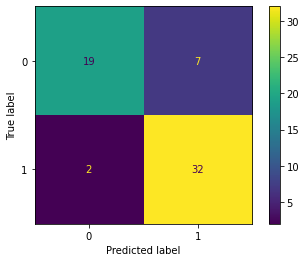

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

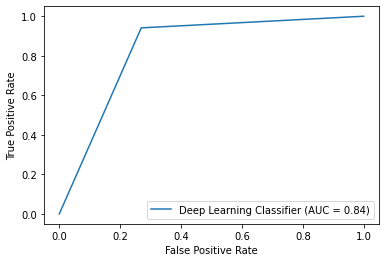

In [58]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
rocDisplay = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Deep Learning Classifier')
rocDisplay.plot()

plt.show()

In [59]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    keras_model = keras.Sequential()
    keras_model.add(
        layers.Dense(
          units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation=hp.Choice("activation", ["relu", "sigmoid", "tanh"]),
            kernel_regularizer=tf.keras.regularizers.L1(0.01),
            activity_regularizer=tf.keras.regularizers.L2(0.01)
        )
    )
    keras_model.add(
        layers.Dropout(
            rate=0.2
        )
    )
    keras_model.add(
        layers.Dense(
#             units=hp.Int("units", min_value=32, max_value=512, step=32),
            units=64,
            activation=hp.Choice("activation", ["relu", "sigmoid", "tanh"]),
            kernel_regularizer=tf.keras.regularizers.L1(0.01),
            activity_regularizer=tf.keras.regularizers.L2(0.01)
        )
    )
    keras_model.add(
        layers.Dropout(
            rate=hp.Choice("rate", [0.05, 0.1, 0.15])
        )
    )
    keras_model.add(
        layers.Dense(
#             units=hp.Int("units", min_value=32, max_value=512, step=32),
            units=32,
            activation=hp.Choice("activation", ["relu", "sigmoid", "tanh"])
        )
    )
    keras_model.add(
        layers.Dense(
            units=1,
            activation="relu"
        )
    )
    keras_model.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
    )
    return keras_model

In [60]:
import keras_tuner as kt

keras_model = build_model(kt.HyperParameters())

In [61]:
tuner = kt.RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 30,
    seed=42,
    executions_per_trial = 3,
    overwrite=True
)

In [62]:
tuner.search(X_train, y_train, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 30 Complete [00h 00m 06s]
val_accuracy: 0.8222222328186035

Best val_accuracy So Far: 0.8444444338480631
Total elapsed time: 00h 02m 29s
INFO:tensorflow:Oracle triggered exit


In [63]:
best_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=512)

Epoch 1/512
8/8 [==============================] - 1s 35ms/step - loss: 20.6417 - accuracy: 0.7848 - val_loss: 20.1853 - val_accuracy: 0.7500
Epoch 2/512
8/8 [==============================] - 0s 6ms/step - loss: 19.0889 - accuracy: 0.7764 - val_loss: 19.1973 - val_accuracy: 0.7833
Epoch 3/512
8/8 [==============================] - 0s 7ms/step - loss: 18.5215 - accuracy: 0.8017 - val_loss: 18.0857 - val_accuracy: 0.7667
Epoch 4/512
8/8 [==============================] - 0s 6ms/step - loss: 17.4701 - accuracy: 0.8270 - val_loss: 17.2913 - val_accuracy: 0.7500
Epoch 5/512
8/8 [==============================] - 0s 6ms/step - loss: 16.5916 - accuracy: 0.8059 - val_loss: 16.8096 - val_accuracy: 0.7833
Epoch 6/512
8/8 [==============================] - 0s 6ms/step - loss: 15.5606 - accuracy: 0.8143 - val_loss: 15.5366 - val_accuracy: 0.8500
Epoch 7/512
8/8 [==============================] - 0s 8ms/step - loss: 14.7892 - accuracy: 0.8186 - val_loss: 14.4501 - val_accuracy: 0.9000
Epoch 8/512


8/8 [==============================] - 0s 6ms/step - loss: 1.7794 - accuracy: 0.8523 - val_loss: 1.8923 - val_accuracy: 0.8667
Epoch 60/512
8/8 [==============================] - 0s 6ms/step - loss: 1.6872 - accuracy: 0.8565 - val_loss: 1.8299 - val_accuracy: 0.8667
Epoch 61/512
8/8 [==============================] - 0s 6ms/step - loss: 1.6329 - accuracy: 0.8439 - val_loss: 1.7737 - val_accuracy: 0.8500
Epoch 62/512
8/8 [==============================] - 0s 6ms/step - loss: 1.5167 - accuracy: 0.8397 - val_loss: 1.5498 - val_accuracy: 0.8500
Epoch 63/512
8/8 [==============================] - 0s 6ms/step - loss: 1.5453 - accuracy: 0.8481 - val_loss: 1.6745 - val_accuracy: 0.8500
Epoch 64/512
8/8 [==============================] - 0s 6ms/step - loss: 1.4479 - accuracy: 0.8608 - val_loss: 1.4591 - val_accuracy: 0.8500
Epoch 65/512
8/8 [==============================] - 0s 6ms/step - loss: 1.4366 - accuracy: 0.8650 - val_loss: 1.4213 - val_accuracy: 0.8500
Epoch 66/512
8/8 [===============

8/8 [==============================] - 0s 6ms/step - loss: 0.6201 - accuracy: 0.8397 - val_loss: 0.6683 - val_accuracy: 0.8000
Epoch 118/512
8/8 [==============================] - 0s 6ms/step - loss: 0.6284 - accuracy: 0.8186 - val_loss: 0.6457 - val_accuracy: 0.8000
Epoch 119/512
8/8 [==============================] - 0s 6ms/step - loss: 0.5935 - accuracy: 0.8481 - val_loss: 0.8077 - val_accuracy: 0.8500
Epoch 120/512
8/8 [==============================] - 0s 6ms/step - loss: 0.5625 - accuracy: 0.8439 - val_loss: 0.7878 - val_accuracy: 0.8667
Epoch 121/512
8/8 [==============================] - 0s 6ms/step - loss: 0.6130 - accuracy: 0.8354 - val_loss: 0.7722 - val_accuracy: 0.8333
Epoch 122/512
8/8 [==============================] - 0s 7ms/step - loss: 0.5839 - accuracy: 0.8608 - val_loss: 0.7643 - val_accuracy: 0.8500
Epoch 123/512
8/8 [==============================] - 0s 7ms/step - loss: 0.5436 - accuracy: 0.8481 - val_loss: 0.7638 - val_accuracy: 0.8500
Epoch 124/512
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 1.3424 - accuracy: 0.8354 - val_loss: 1.3563 - val_accuracy: 0.8500
Epoch 176/512
8/8 [==============================] - 0s 7ms/step - loss: 1.3079 - accuracy: 0.8439 - val_loss: 1.3016 - val_accuracy: 0.8667
Epoch 177/512
8/8 [==============================] - 0s 7ms/step - loss: 1.2548 - accuracy: 0.8312 - val_loss: 1.2597 - val_accuracy: 0.8333
Epoch 178/512
8/8 [==============================] - 0s 6ms/step - loss: 1.1966 - accuracy: 0.8523 - val_loss: 1.2156 - val_accuracy: 0.8333
Epoch 179/512
8/8 [==============================] - 0s 6ms/step - loss: 1.1494 - accuracy: 0.8397 - val_loss: 1.1895 - val_accuracy: 0.8500
Epoch 180/512
8/8 [==============================] - 0s 6ms/step - loss: 1.1714 - accuracy: 0.8608 - val_loss: 1.3309 - val_accuracy: 0.8500
Epoch 181/512
8/8 [==============================] - 0s 5ms/step - loss: 1.1450 - accuracy: 0.8481 - val_loss: 1.2948 - val_accuracy: 0.8500
Epoch 182/512
8/8 [========

8/8 [==============================] - 0s 9ms/step - loss: 0.5783 - accuracy: 0.8439 - val_loss: 0.8048 - val_accuracy: 0.8500
Epoch 234/512
8/8 [==============================] - 0s 8ms/step - loss: 0.6206 - accuracy: 0.8312 - val_loss: 0.7994 - val_accuracy: 0.8333
Epoch 235/512
8/8 [==============================] - 0s 7ms/step - loss: 0.6192 - accuracy: 0.8397 - val_loss: 0.7935 - val_accuracy: 0.8333
Epoch 236/512
8/8 [==============================] - 0s 6ms/step - loss: 0.5482 - accuracy: 0.8439 - val_loss: 0.7890 - val_accuracy: 0.8333
Epoch 237/512
8/8 [==============================] - 0s 7ms/step - loss: 0.6104 - accuracy: 0.8481 - val_loss: 0.7860 - val_accuracy: 0.8333
Epoch 238/512
8/8 [==============================] - 0s 6ms/step - loss: 0.6189 - accuracy: 0.8523 - val_loss: 0.7838 - val_accuracy: 0.8500
Epoch 239/512
8/8 [==============================] - 0s 7ms/step - loss: 0.6104 - accuracy: 0.8481 - val_loss: 0.7815 - val_accuracy: 0.8500
Epoch 240/512
8/8 [========

Epoch 291/512
8/8 [==============================] - 0s 6ms/step - loss: 0.5442 - accuracy: 0.8439 - val_loss: 0.7108 - val_accuracy: 0.8500
Epoch 292/512
8/8 [==============================] - 0s 6ms/step - loss: 0.5346 - accuracy: 0.8397 - val_loss: 0.7061 - val_accuracy: 0.8500
Epoch 293/512
8/8 [==============================] - 0s 6ms/step - loss: 0.5403 - accuracy: 0.8481 - val_loss: 0.7027 - val_accuracy: 0.8500
Epoch 294/512
8/8 [==============================] - 0s 7ms/step - loss: 0.5766 - accuracy: 0.8565 - val_loss: 0.7009 - val_accuracy: 0.8500
Epoch 295/512
8/8 [==============================] - 0s 6ms/step - loss: 0.5504 - accuracy: 0.8481 - val_loss: 0.7039 - val_accuracy: 0.8500
Epoch 296/512
8/8 [==============================] - 0s 7ms/step - loss: 0.5466 - accuracy: 0.8397 - val_loss: 0.7016 - val_accuracy: 0.8500
Epoch 297/512
8/8 [==============================] - 0s 8ms/step - loss: 0.5277 - accuracy: 0.8523 - val_loss: 0.7009 - val_accuracy: 0.8500
Epoch 298/512

8/8 [==============================] - 0s 6ms/step - loss: 0.5280 - accuracy: 0.8439 - val_loss: 0.6852 - val_accuracy: 0.8500
Epoch 350/512
8/8 [==============================] - 0s 6ms/step - loss: 0.4597 - accuracy: 0.8481 - val_loss: 0.6860 - val_accuracy: 0.8500
Epoch 351/512
8/8 [==============================] - 0s 6ms/step - loss: 0.4979 - accuracy: 0.8565 - val_loss: 0.6838 - val_accuracy: 0.8333
Epoch 352/512
8/8 [==============================] - 0s 5ms/step - loss: 0.4925 - accuracy: 0.8354 - val_loss: 0.7126 - val_accuracy: 0.8000
Epoch 353/512
8/8 [==============================] - 0s 5ms/step - loss: 0.5839 - accuracy: 0.8481 - val_loss: 0.7011 - val_accuracy: 0.8333
Epoch 354/512
8/8 [==============================] - 0s 5ms/step - loss: 0.5312 - accuracy: 0.8439 - val_loss: 0.7022 - val_accuracy: 0.8500
Epoch 355/512
8/8 [==============================] - 0s 6ms/step - loss: 0.5396 - accuracy: 0.8439 - val_loss: 0.7054 - val_accuracy: 0.8500
Epoch 356/512
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.5170 - accuracy: 0.8608 - val_loss: 0.6811 - val_accuracy: 0.8500
Epoch 408/512
8/8 [==============================] - 0s 6ms/step - loss: 0.5254 - accuracy: 0.8312 - val_loss: 0.6813 - val_accuracy: 0.8500
Epoch 409/512
8/8 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8523 - val_loss: 0.6839 - val_accuracy: 0.8500
Epoch 410/512
8/8 [==============================] - 0s 6ms/step - loss: 0.5220 - accuracy: 0.8481 - val_loss: 0.6790 - val_accuracy: 0.8500
Epoch 411/512
8/8 [==============================] - 0s 6ms/step - loss: 0.4451 - accuracy: 0.8523 - val_loss: 0.6792 - val_accuracy: 0.8500
Epoch 412/512
8/8 [==============================] - 0s 6ms/step - loss: 0.5050 - accuracy: 0.8439 - val_loss: 0.6780 - val_accuracy: 0.8500
Epoch 413/512
8/8 [==============================] - 0s 6ms/step - loss: 0.5240 - accuracy: 0.8523 - val_loss: 0.6751 - val_accuracy: 0.8500
Epoch 414/512
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.5005 - accuracy: 0.8523 - val_loss: 0.6691 - val_accuracy: 0.8500
Epoch 466/512
8/8 [==============================] - 0s 8ms/step - loss: 0.5019 - accuracy: 0.8565 - val_loss: 0.6696 - val_accuracy: 0.8500
Epoch 467/512
8/8 [==============================] - 0s 11ms/step - loss: 0.5056 - accuracy: 0.8439 - val_loss: 0.6719 - val_accuracy: 0.8500
Epoch 468/512
8/8 [==============================] - 0s 13ms/step - loss: 0.4542 - accuracy: 0.8481 - val_loss: 0.6735 - val_accuracy: 0.8333
Epoch 469/512
8/8 [==============================] - 0s 11ms/step - loss: 0.5078 - accuracy: 0.8354 - val_loss: 0.6721 - val_accuracy: 0.8333
Epoch 470/512
8/8 [==============================] - 0s 8ms/step - loss: 0.4934 - accuracy: 0.8523 - val_loss: 0.6689 - val_accuracy: 0.8500
Epoch 471/512
8/8 [==============================] - 0s 8ms/step - loss: 0.5136 - accuracy: 0.8439 - val_loss: 0.6656 - val_accuracy: 0.8500
Epoch 472/512
8/8 [=====

In [64]:
pred = best_model.predict(X_test)
pred = np.where(pred < .5, 0, 1)

# Plotting the Results

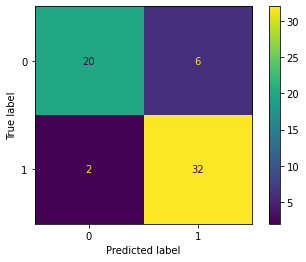

In [65]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

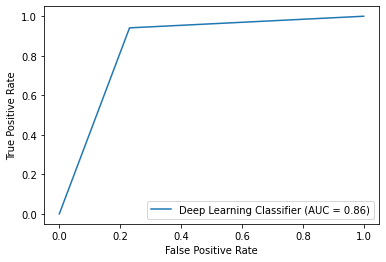

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
rocDisplay = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Deep Learning Classifier')
rocDisplay.plot()

plt.show()